In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

In [4]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = 'DL_course_data/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')
train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

#creating the sets
x_train, x_test, y_train, y_test = get_train_test_arrays(train_data_path, test_data_path,train_list, test_list, img_h, img_w)

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


In [5]:
lr = 0.00001
opt = Adam(learning_rate=lr)
batch_size = 8
n_epochs = 150
base_dense = 8
dr = 0.4
loss_function = 'binary_crossentropy'

#y_test[y_test==0]=-1
#y_train[y_train==0]=-1

In [6]:
def Alex_model(img_ch, img_width, img_height):
    model = Sequential()
    model.add(Conv2D(filters=base_dense, input_shape=(img_width, img_height, img_ch),
    kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *4, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(filters= base_dense *2, kernel_size=(3,3), strides=(1,1), padding='same')) 
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten()) 
    model.add(Dense(128))
    #model.add(Dropout(dr))
    model.add(Activation('relu'))
    
    model.add(Dense(64)) 
    #model.add(Dropout(dr))
    model.add(Activation('relu'))
    model.add(Dense(1))
    #model.add(Dropout(dr))
    model.add(Activation('sigmoid'))
    model.summary() 
    return model


In [9]:
clf=Alex_model(1,img_w, img_h)
clf.compile(loss=loss_function,optimizer = opt,metrics=['binary_accuracy'])
clf_hist=clf.fit(x_train,y_train,batch_size,n_epochs,validation_data=(x_test, y_test))

print("The predicted classes labels are:",clf.predict(x_train))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 8)       80        
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)       

Epoch 33/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5453 - binary_accuracy: 0.7340 - val_loss: 0.5489 - val_binary_accuracy: 0.7300
Epoch 34/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5436 - binary_accuracy: 0.7320 - val_loss: 0.5401 - val_binary_accuracy: 0.7550
Epoch 35/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5416 - binary_accuracy: 0.7350 - val_loss: 0.5467 - val_binary_accuracy: 0.7300
Epoch 36/150
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5400 - binary_accuracy: 0.7430 - val_loss: 0.5344 - val_binary_accuracy: 0.7900
Epoch 37/150
1000/1000 [==============================] - 1s 876us/sample - loss: 0.5436 - binary_accuracy: 0.7340 - val_loss: 0.5326 - val_binary_accuracy: 0.7650
Epoch 38/150
1000/1000 [==============================] - 1s 824us/sample - loss: 0.5363 - binary_accuracy: 0.7270 - val_loss: 0.5317 - val_binary_accuracy: 0.7750
Epoch 39/150
1000/1000 [

1000/1000 [==============================] - 1s 884us/sample - loss: 0.4910 - binary_accuracy: 0.7720 - val_loss: 0.4893 - val_binary_accuracy: 0.8000
Epoch 84/150
1000/1000 [==============================] - 1s 876us/sample - loss: 0.4944 - binary_accuracy: 0.7770 - val_loss: 0.4986 - val_binary_accuracy: 0.7700
Epoch 85/150
1000/1000 [==============================] - 1s 878us/sample - loss: 0.4949 - binary_accuracy: 0.7670 - val_loss: 0.4870 - val_binary_accuracy: 0.7950
Epoch 86/150
1000/1000 [==============================] - 1s 876us/sample - loss: 0.4876 - binary_accuracy: 0.7660 - val_loss: 0.5073 - val_binary_accuracy: 0.8200
Epoch 87/150
1000/1000 [==============================] - 1s 724us/sample - loss: 0.4869 - binary_accuracy: 0.7830 - val_loss: 0.5309 - val_binary_accuracy: 0.7800
Epoch 88/150
1000/1000 [==============================] - 1s 882us/sample - loss: 0.4902 - binary_accuracy: 0.7810 - val_loss: 0.4899 - val_binary_accuracy: 0.8250
Epoch 89/150
1000/1000 [=====

1000/1000 [==============================] - 1s 973us/sample - loss: 0.4516 - binary_accuracy: 0.7930 - val_loss: 0.4711 - val_binary_accuracy: 0.7900
Epoch 134/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4503 - binary_accuracy: 0.8020 - val_loss: 0.4669 - val_binary_accuracy: 0.7950
Epoch 135/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4505 - binary_accuracy: 0.7930 - val_loss: 0.4641 - val_binary_accuracy: 0.8050
Epoch 136/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4474 - binary_accuracy: 0.8060 - val_loss: 0.4873 - val_binary_accuracy: 0.7750
Epoch 137/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4499 - binary_accuracy: 0.8040 - val_loss: 0.4632 - val_binary_accuracy: 0.8250
Epoch 138/150
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4464 - binary_accuracy: 0.7980 - val_loss: 0.4960 - val_binary_accuracy: 0.7700
Epoch 139/150
1000/1000 [=========

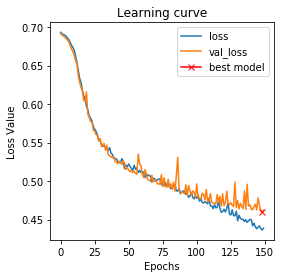

In [10]:
%matplotlib inline

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(clf_hist.history["loss"], label="loss")
plt.plot(clf_hist.history["val_loss"], label="val_loss")
plt.plot( np.argmin(clf_hist.history["val_loss"]),
 np.min(clf_hist.history["val_loss"]),
 marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 